# CS 4820
# Assignment 4: Data Pre-processing and Model Analysis

# Due: 2:00pm October 2, 2019

The [Pima Indians dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for 614 women age 21 and above of Pima indian origins. The objective is to predict, based on diagnostic measurements, whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last column is the outcome, and it is a binary variable.

In this assignment, you are asked to build an ANN model to do the diabetes prediction. 

### 0. The *diabetes* Dataset and Data Preprocessing


In [1]:
# your code here ...
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('data/diabetes.csv')
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

### 1. Binary-Classification Model


In [3]:
# your code here ...
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='softmax'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'Adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, verbose=2, batch_size=10)

Epoch 1/100
614/614 - 0s - loss: 0.6860 - accuracy: 0.6075
Epoch 2/100
614/614 - 0s - loss: 0.6645 - accuracy: 0.6515
Epoch 3/100
614/614 - 0s - loss: 0.6362 - accuracy: 0.6515
Epoch 4/100
614/614 - 0s - loss: 0.5995 - accuracy: 0.6564
Epoch 5/100
614/614 - 0s - loss: 0.5585 - accuracy: 0.7150
Epoch 6/100
614/614 - 0s - loss: 0.5197 - accuracy: 0.7622
Epoch 7/100
614/614 - 0s - loss: 0.4986 - accuracy: 0.7638
Epoch 8/100
614/614 - 0s - loss: 0.4857 - accuracy: 0.7704
Epoch 9/100
614/614 - 0s - loss: 0.4783 - accuracy: 0.7736
Epoch 10/100
614/614 - 0s - loss: 0.4742 - accuracy: 0.7769
Epoch 11/100
614/614 - 0s - loss: 0.4728 - accuracy: 0.7687
Epoch 12/100
614/614 - 0s - loss: 0.4693 - accuracy: 0.7769
Epoch 13/100
614/614 - 0s - loss: 0.4689 - accuracy: 0.7736
Epoch 14/100
614/614 - 0s - loss: 0.4662 - accuracy: 0.7752
Epoch 15/100
614/614 - 0s - loss: 0.4627 - accuracy: 0.7769
Epoch 16/100
614/614 - 0s - loss: 0.4604 - accuracy: 0.7801
Epoch 17/100
614/614 - 0s - loss: 0.4607 - accura

### 2. Analysis

In [4]:
# your code here ...
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       100
           1       0.80      0.76      0.78        54

   micro avg       0.85      0.85      0.85       154
   macro avg       0.84      0.83      0.83       154
weighted avg       0.85      0.85      0.85       154



In [5]:
cm = confusion_matrix(y_test, y_pred)

pd.DataFrame(cm)

,0,1
0,90,10
1,13,41


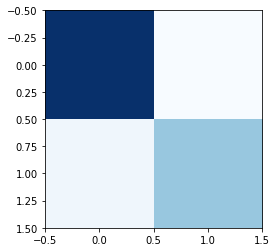

In [6]:
plt.imshow(cm, cmap='Blues')